<img src="../dsi.png" style="height:128px;">

# Lesson 1: Why Data Science?

Welcome to the interactive Jupyter Notebook-based component of *Data Science for India!*

Each week, we're going to practice what we covered in the worksheets with *programs* on the computer. We talked a lot about how computers are useful when working with data, so let's close out today's session with an example.

Today we're going to look at some data, and how we can *visualize* it! Along the way, we'll learn about Jupyter Notebooks and how to use them. In this notebook, you will also see some lines of *code*. Code is something that a machine can understand and *interpret*, or make sense of. 

Just like you know how to speak languages like English, Hindi, and many more, you'll soon know how to write code in a language called Python. Python is just one of the many languages computers can understand! For today, you won't need to write any code unless you are curious and want to play around (go ahead!). Instead, just look at a few of the cool things we can do with data science.

Run each "cell", or block of code, by pressing the keys "Shift" and "Enter" at the same time. 

In [2]:
# Below we have `import` statements, which help us set up the notebook! 
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'numpy'

Some lines of code are equal to a value. In Jupyter notebooks, we actually get to see what the result of the last line of code is equal to.

Here, we're going to read a *table* of data about the quality of different bodies of water all over India. You might recognize some of these rivers and lakes. In fact, you might have even been there!


The *rows* (displayed sideways) of the table represent the location where the measurements were taken, and the *columns* (displayed vertically), show the different types of measurements. You might even recognize some from chemistry class.

In [3]:
water = Table().read_table("water_quality.csv")
water

NameError: name 'Table' is not defined

Of course, the Jupyter notebook won't show us *all* the data points. Let's see how many locations were part of the survey. 

To give us a little bit more information, let's look at the states where data was taken.

In [13]:
print("Data was taken at " + str(water.num_rows) + " locations" + " in " +
      str(water.group("State Name").num_rows) + " states.")
water.group("State Name")

Data was taken at 1692 locations in 30 states.


State Name,count
Andhra Pradesh,96
Assam,100
Bihar,86
Chandigarh,9
Chhattisgarh,24
Delhi,12
Goa,29
Gujarat,58
Haryana,18
Himachal Pradesh,103


Let's see if we can figure out some information about the temperature of the water from each state. Because there were multiple sites in each state, we need to find the value that's most representative of data from the entire state.
Thus, we'll take the *average* of each column. The *average*, or *mean*, is a number that represents the center of a group of numbers. We can now *visualize* this data with a *bar graph*.

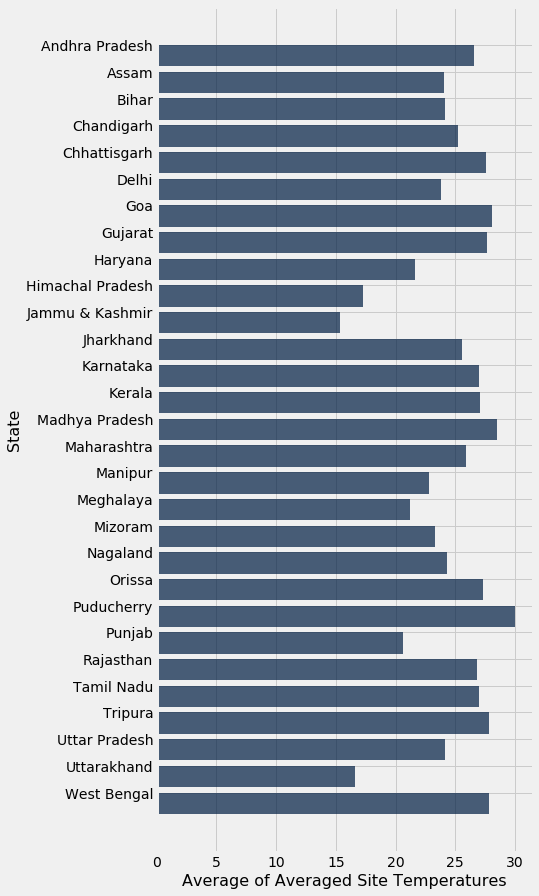

In [14]:
grouped = water.where(water.column(6), lambda x : x == x).group("State Name", np.average)
temperatures = Table().with_columns("State", grouped.column(0),
                                   "Average of Minimum Site Temperatures", grouped.column(4),
                                   "Average of Maximum Site Temperatures", grouped.column(5),
                                   "Average of Averaged Site Temperatures", grouped.column(6))
temperatures.barh("State", "Average of Averaged Site Temperatures")

The table also contains information on the amount of coliform bacteria detected in the water. This is extremely important to know, beacause it shows that some sites have more germs than others and where you're more likely to get sick as a result of using the water without purifying it before. It'll be helpful for doctors and public health officials to know what diseases are being caused due to infected water.

This table shows reports of the cases for certain diseases by state.

In [15]:
disease = Table.read_table("diseases.csv")
disease

Year,State/UTs,Acute Diarrhoeal Diseases - Cases,Acute Diarrhoeal Diseases - Deaths,Malaria - Cases,Malaria - Deaths,Acute Respiaratory Infection - Cases,Acute Respiaratory Infection - Deaths,Japanese Encephalitis - Cases,Japanese Encephalitis - Deaths,Viral Hepatitis - Cases,Viral Hepatitis - Deaths
2011(P),GRAND TOTAL,10231049,1269,1278760,463,26300208,2492,8249,1169,94402,520
2011(P),Andhra Pradesh,2235614,107,39559,5,3089290,236,73,1,11050,61
2011(P),Arunachal Pradesh,32228,11,10961,nan,48602,9,nan,nan,636,4
2011(P),Assam,96816,16,47397,42,314824,nan,1319,250,2557,25
2011(P),Bihar,130276,nan,2390,0,87486,nan,821,197,202,nan
2011(P),Chhattisgarh,64575,5,131179,18,155743,18,nan,nan,139,1
2011(P),Delhi,102983,62,413,nan,198541,102,9,nan,8347,68
2011(P),Goa,15146,2,1231,1,61029,6,91,1,118,nan
2011(P),Gujarat,367450,0,86005,15,604076,nan,nan,nan,4328,nan
2011(P),Haryana,224223,21,33345,1,1275035,48,90,14,2557,2


Now, we'll need to analyze the data from both tables, so we'll do the following: *group* bacterial content by state (find the average), and *join* the two tables.

In [16]:
def clean(tbl, col_1, col_2):
    cleaned_col_1 = tbl.where(tbl.column(col_1), lambda x : x == x)
    return cleaned_col_1.where(cleaned_col_1.column(col_2), lambda x: x == x)


cleaned = clean(water, 24, 27)
bacteria = Table().with_columns("State Name", cleaned.column(3),
                    "Fecal Coliform", cleaned.column(24),
                    "Total Coliform", cleaned.column(27))
grouped = bacteria.group("State Name", np.average)
grouped

State Name,Fecal Coliform average,Total Coliform average
Andhra Pradesh,159.326,1002.43
Assam,237.475,1294.14
Bihar,1307.81,3429.77
Chhattisgarh,270,186.75
Delhi,4.73283e+07,1.28065e+08
Goa,7.83333,149.25
Gujarat,456.556,1295.31
Haryana,42723.7,183530
Himachal Pradesh,94.6087,459.505
Jharkhand,224.444,1350


In [17]:
joined_avgs = grouped.join("State Name", disease, "State/UTs")
joined_avgs

State Name,Fecal Coliform average,Total Coliform average,Year,Acute Diarrhoeal Diseases - Cases,Acute Diarrhoeal Diseases - Deaths,Malaria - Cases,Malaria - Deaths,Acute Respiaratory Infection - Cases,Acute Respiaratory Infection - Deaths,Japanese Encephalitis - Cases,Japanese Encephalitis - Deaths,Viral Hepatitis - Cases,Viral Hepatitis - Deaths
Andhra Pradesh,159.326,1002.43,2011(P),2235614,107,39559,5,3089290,236,73,1,11050,61
Assam,237.475,1294.14,2011(P),96816,16,47397,42,314824,nan,1319,250,2557,25
Bihar,1307.81,3429.77,2011(P),130276,nan,2390,0,87486,nan,821,197,202,nan
Chhattisgarh,270,186.75,2011(P),64575,5,131179,18,155743,18,nan,nan,139,1
Delhi,4.73283e+07,1.28065e+08,2011(P),102983,62,413,nan,198541,102,9,nan,8347,68
Goa,7.83333,149.25,2011(P),15146,2,1231,1,61029,6,91,1,118,nan
Gujarat,456.556,1295.31,2011(P),367450,0,86005,15,604076,nan,nan,nan,4328,nan
Haryana,42723.7,183530,2011(P),224223,21,33345,1,1275035,48,90,14,2557,2
Himachal Pradesh,94.6087,459.505,2011(P),310227,51,247,nan,1484149,154,nan,nan,1248,10
Jharkhand,224.444,1350,2011(P),98258,1,152061,16,205496,5,303,19,384,2


In [18]:
def make_plot(ax, tbl, xcol, ycol):
    if type(ycol) == int:
        lbl = tbl.labels[ycol]
    else:
        lbl = ycol
    ax.scatter(tbl.column(xcol), tbl.column(ycol), label=lbl)
    return lbl

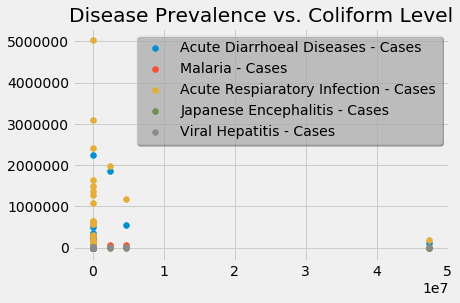

In [19]:
fig, ax = plt.subplots()
ax.set_title('Disease Prevalence vs. Coliform Level')
labels = []
for disease in joined_avgs.labels[4:14:2]:
    labels.append(make_plot(ax, joined_avgs, 'Fecal Coliform average', disease))
leg = ax.legend(loc='upper right', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
shown = {}
for legentry, axentry in zip(leg.get_label(), labels):
    legentry.set_picker(5)
    shown[legentry] = axentry
    

def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

    
fig.canvas.mpl_connect('pick_event', onpick)

plt.show()